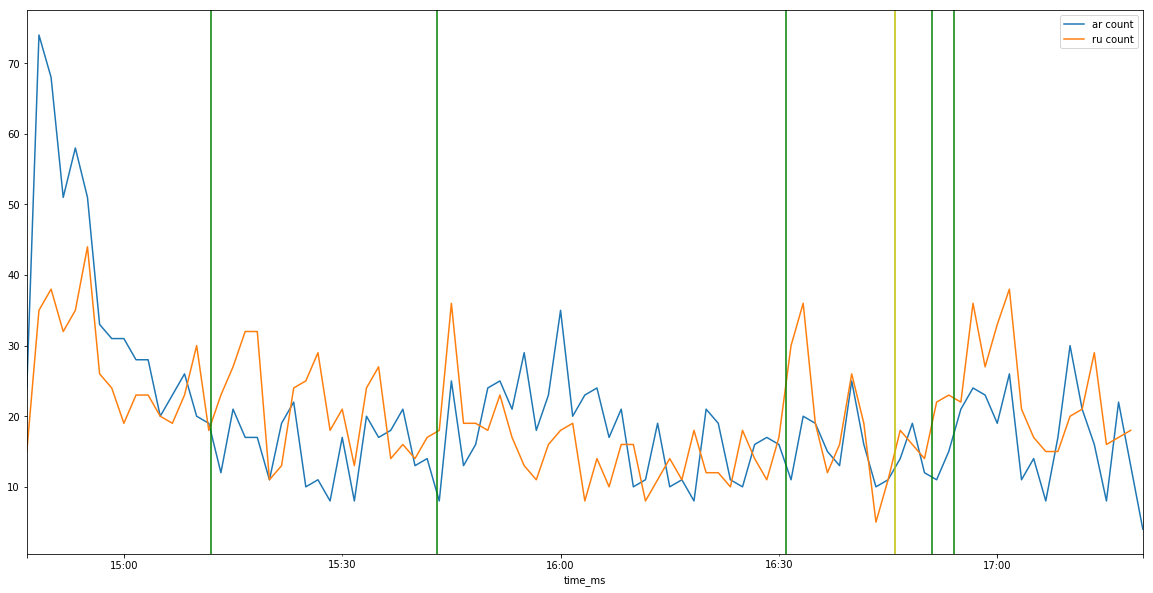

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# kickoff 17:01, 
# goal at: 12, 43, 71, 91, 94

df = pd.read_csv('first-game-panda-frame_med.csv')

df['time_ms'] = pd.to_datetime(df['time_ms'], unit='ms')
df = df.set_index('time_ms')

ar = df[df['lang'] == 'ar']
ru = df[df['lang'] == 'ru']

plt.figure(figsize=(20,10))

v = 'anger' #sentiment,anger,joy,sadness,fear,surprise
f = '100S'
ar[v].resample(f).count().plot(label='ar count')
ru[v].resample(f).count().plot(label='ru count')

from datetime import datetime
plt.axvline(x=datetime.strptime('2018-06-14 15:12', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 15:43', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:31', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:51', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:54', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:46', '%Y-%m-%d %H:%M'), color='y')

plt.legend(bbox_to_anchor=(1, 1))

0 days 00:00:50


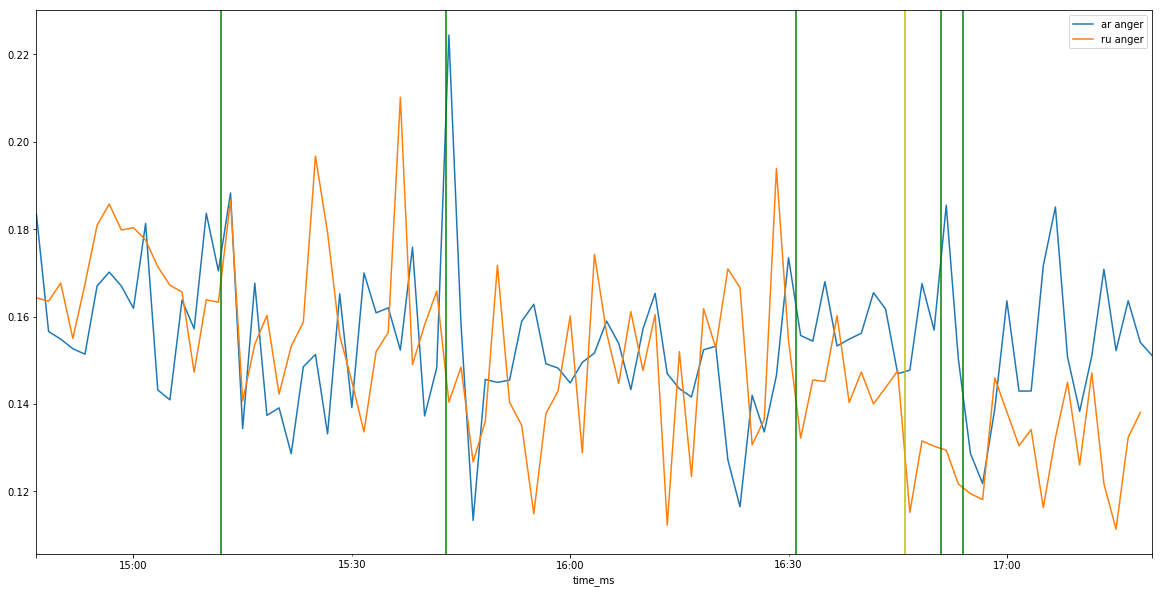

In [89]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# kickoff 17:01, 
# goal at: 12, 43, 71, 91, 94

df = pd.read_csv('first-game-panda-frame_med.csv')

df['time_ms'] = pd.to_datetime(df['time_ms'], unit='ms')
df = df.set_index('time_ms')

ar = df[df['lang'] == 'ar']
ru = df[df['lang'] == 'ru']

print(pd.Timedelta('50 seconds'))

plt.figure(figsize=(20,10))

v = 'anger' #sentiment,anger,joy,sadness,fear,surprise
f = '100S'
ar[v].resample(f).mean().plot(label='ar {}'.format(v))
ru[v].resample(f).mean().plot(label='ru {}'.format(v))

from datetime import datetime
plt.axvline(x=datetime.strptime('2018-06-14 15:12', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 15:43', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:31', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:51', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:54', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:46', '%Y-%m-%d %H:%M'), color='y')

plt.legend(bbox_to_anchor=(1, 1))

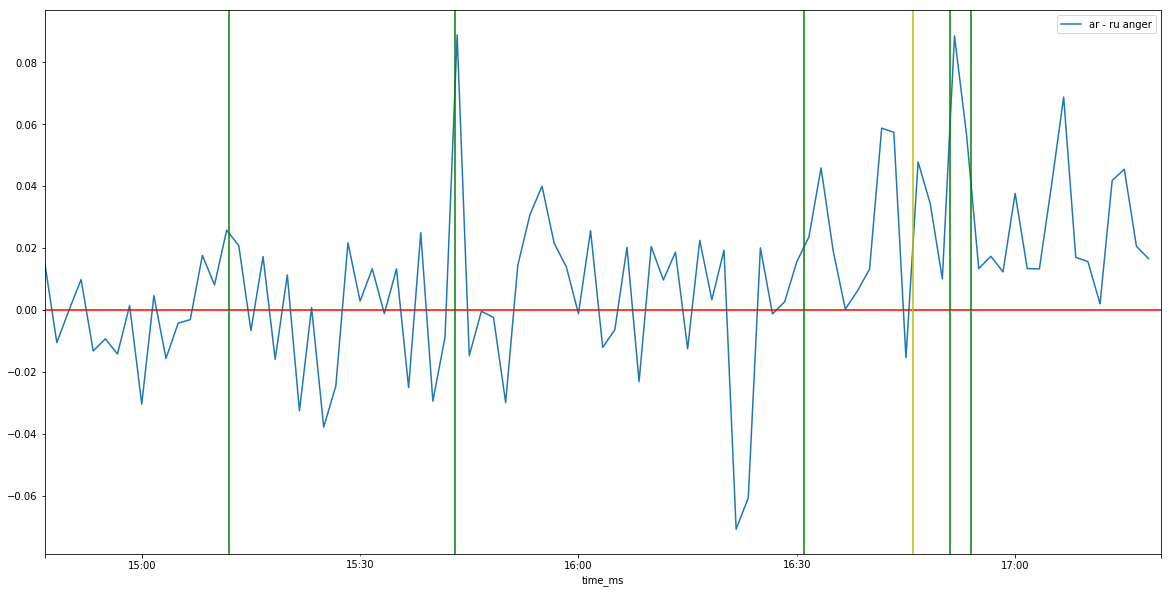

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# kickoff 17:01, 
# goal at: 12, 43, 71, 91, 94
# yellow ru at: 94
# yellow ar at: 88

df = pd.read_csv('first-game-panda-frame_med.csv')

df['time_ms'] = pd.to_datetime(df['time_ms'], unit='ms')
df = df.set_index('time_ms')

ar = df[df['lang'] == 'ar']
ru = df[df['lang'] == 'ru']

plt.figure(figsize=(20,10))

v = 'anger' #sentiment,anger,joy,sadness,fear,surprise
f = '100S'
#ar[v].resample(f).median().plot(label='ar {}'.format(v))
#ru[v].resample(f).median().plot(label='ru {}'.format(v))

(ar[v].resample(f).median() - ru[v].resample(f).median()).plot(label='ar - ru {}'.format(v))
plt.axhline(color='r')

from datetime import datetime
plt.axvline(x=datetime.strptime('2018-06-14 15:12', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 15:43', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:31', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:51', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:54', '%Y-%m-%d %H:%M'), color='g')
plt.axvline(x=datetime.strptime('2018-06-14 16:46', '%Y-%m-%d %H:%M'), color='y')

plt.legend(bbox_to_anchor=(1, 1))

In [92]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# kickoff 17:01, 
# goal at: 12, 43, 71, 91, 94
# yellow ru at: 94
# yellow ar at: 88

df = pd.read_csv('first-game-panda-frame_med.csv')

df['time_ms'] = pd.to_datetime(df['time_ms'], unit='ms')
df = df.set_index('time_ms')
print(len(df))

#btime = datetime.strptime('2018-06-14 16:50', '%Y-%m-%d %H:%M')
#etime = datetime.strptime('2018-06-14 16:52', '%Y-%m-%d %H:%M')
#df = df.iloc[slice(btime, etime)]

df = df[df['lang'] == 'ar']
ru = df[df['lang'] == 'ru']

import plotly.plotly as py
import pandas as pd

emotion = 'anger'
df = df.groupby('iso3166a3')[emotion].mean()

data = [ 
    dict(
        type = 'choropleth',
        locations = list(df.index),
        z = list(df),
        text = "text",
        colorscale = [[0,"rgb(5, 10, 172)"], [0.2,"rgb(40, 60, 190)"], [1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            )
        ),        
        zmin = 0,        
    ) 
]

layout = dict(
    title = emotion,
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(type = 'Mercator')
    )
)

fig = dict( data=data, layout=layout )
py.iplot(fig, filename='d3-world-map')

48955


In [75]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# kickoff 17:01, 
# goal at: 12, 43, 71, 91, 94
# yellow ru at: 94
# yellow ar at: 88

df = pd.read_csv('first-game-panda-frame_med.csv')

df['time_ms'] = pd.to_datetime(df['time_ms'], unit='ms')
df = df.set_index('time_ms')

g = df.groupby('iso3166a3')['sentiment'].count()

